# [Aula 3] Introdução a plot de gráficos

![](miniflango.jpg)

Existem bibliotecas que nos auxiliam a fazer gráficos e assim conseguir uma representação visual de algum resultado, seja em um trabalho da faculdade ou em um projeto que envolva análise de dados. Alguns exemplos dessas bibliotecas são:

1. **Matplotlib**
2. Seaborn
3. Bokeh
4. Plotly

O foco nesse curso será dar um direcionamento no uso da Matplotlib, pacote mais simples e mais utilizado (até mesmo na Unicamp)

## 1 - Importando os pacotes

In [2]:
# numpy, visto na aula passada para operações matriciais
import numpy as np

# pandas, visto na aula passada para leitura e manipulação de base de dados
import pandas as pd

#matplotlib, importaremos especificamente o modulo de plot de gráficos "pyplot"
import matplotlib.pyplot as plt

#A linha abaixo serve para dizer para o notebook que queremos que os gráficos sejam plotados em uma célula do jupyter
%matplotlib inline

## 2 - Lendo base de dados

In [3]:
# Utilizaremos novamente a base de dados do titanic
base = pd.read_csv("train.csv")

In [4]:
# Printando o tamanho da base
base.shape

(891, 12)

Temos então uma base com 891 linhas e 12 colunas

## 3 - Gráficos

Nesta seção inciaremos a prática de plot de gráficos, associando com análises nos dados.


In [29]:
# Visualizando as variáveis da base de dados para termos ideias de que tipo de visualização é interessante se ter
base.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3.1 - Gráfico de barras

O gráfico de barras é um gráfico bem comum e simples, permite passar ideia de proporções e ordenações.

- Sintaxe: pld.bar()
- Principais parâmetros:
    - left: Série de posições (vetor com n elementos sendo n a quantidade de dados que você quer plotar)
    - x: Dados a serem plotados
    
Ex: Checar se as mortes foram mais específicas para alguma classe social

In [6]:
# Utilizaremos a função gorupby do pandas para agrupar a média de mortes por classe social "Pclass"

agrup_classe = base.groupby('Pclass').agg({'Survived': np.mean}).reset_index()

agrup_classe

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


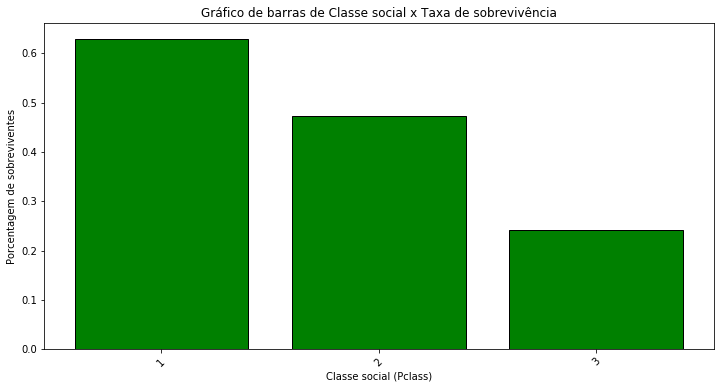

In [21]:
# O resultado então pode ser apresentado em formato de uma gráfico de barras

# O comando figure define a janela que vai ser exibido o plot, o argumento "figsize" define a largura e altura do gráfico
plt.figure(figsize=(12,6))

# O comando title define o título a ser exibido no gráfico
plt.title("Gráfico de barras de Classe social x Taxa de sobrevivência")

# O comando bar indica que queremos um gráfico de barras com 3 posições onde cada uma é referente a um valor de taxa de sobrevivência da base
plt.bar(np.arange(agrup_classe.shape[0]),agrup_classe['Survived'], color='green', edgecolor = 'black')

# O comando xticks define os valores no eixo "x", possibilitando assim editarmos com o texto que quisermos
plt.xticks(np.arange(agrup_classe.shape[0]), agrup_classe['Pclass'],rotation = 45)

# Os comandos xlabel e ylabel adicionam texto descritivos no eixo
plt.xlabel("Classe social (Pclass)")
plt.ylabel("Porcentagem de sobreviventes")

# O comando show indica que queremos plotar na tela tudo o que definimos acima
plt.show()

**Intuição** : De fato, parece que a classe "1" era mais propensa a sobreviver enquanto que a classe "3" era a mais propensa a morrer

** Variação: Gráfico de barras stacked **

Utilizado quando queremos mostrar subdivisões dentro de uma mesma estatística.

Ex:

Vamos pegar a mesma estatística de Procentagem de sobreviventes x classe social, porém agora com uma base só do público feminino e outra só com o masculino

In [39]:
# Criando a base separada para Mulheres e homens

agrup_mulher = base[base['Sex'] == 'female'].groupby('Pclass').agg({'Survived':np.sum}).reset_index()
agrup_omi = base[base['Sex'] == 'male'].groupby('Pclass').agg({'Survived':np.sum}).reset_index()
total = base.groupby('Pclass').agg({'Survived': 'count'}).reset_index()

total['Survived_omi'] = agrup_omi['Survived']/total['Survived']
total['Survived_mulher'] = agrup_mulher['Survived']/total['Survived']


In [40]:
total

,Pclass,Survived,Survived_omi,Survived_mulher
0,1,216,0.208333,0.421296
1,2,184,0.092391,0.380435
2,3,491,0.095723,0.146640


Só pelos resultados podemos ver que existe uma relação muito alta entre Mulheres da classe 1 e 2 e a se sobreviveram ou não.

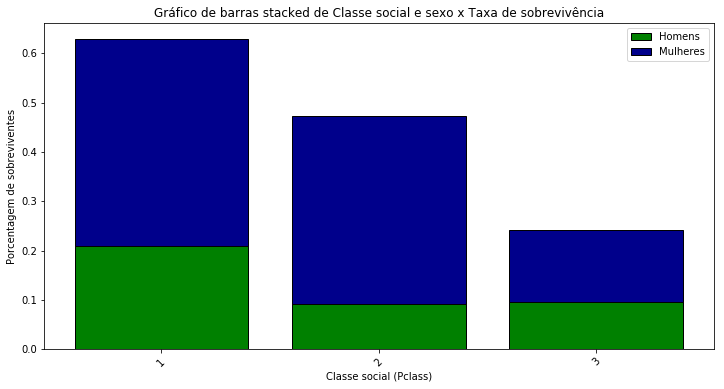

In [43]:
# Visualizando gráficamente


plt.figure(figsize=(12,6))


plt.title("Gráfico de barras stacked de Classe social e sexo x Taxa de sobrevivência")


plt.bar(np.arange(total.shape[0]),total['Survived_omi'], color='green', edgecolor = 'black', label='Homens')
plt.bar(np.arange(total.shape[0]),total['Survived_mulher'], color='darkblue', edgecolor = 'black', bottom=total['Survived_omi'], label='Mulheres')


plt.xticks(np.arange(total.shape[0]), total['Pclass'],rotation = 45)

plt.xlabel("Classe social (Pclass)")
plt.ylabel("Porcentagem de sobreviventes")

plt.legend()
plt.show()

**Intuição** :  Em geral as mulheres sobreviveram mais, principalmente nas classes mais altas

## 3.2 - Histograma

O histograma é muito importante na hora de analisar uma variável, pois dessa forma você consegue visualizar a distribuição dessa variável e assim definir a melhor forma de lidar com ela

- Sintaxe: pld.hist()
- Principais parâmetros:
    - x: Série de dados
    - bins: Quantidade de intervalos para calcular a frequência

Ex: Vamos ver a distribuição de idades

ValueError: max must be larger than min in range parameter.

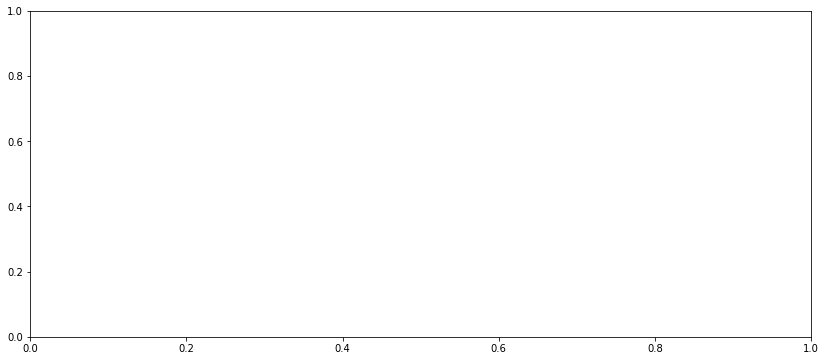

In [35]:
# Qual a importância daquele tratamento de base visto anteriormente?

#Como um gráfico ira mostrar um dado nulo?

plt.figure(figsize=(14,6))

# Única parte diferente, o comando Hist faz o histograma de uma série de dados
plt.hist(base['Age'],bins=50)
plt.xlabel('Idades')
plt.ylabel('Frequências')
plt.show()

Ocorreu um erro, bem na linha onde utilizamos a função "hist", porque ocorreu?

Vamos checar a série de dados de idades

In [36]:
# Vamos somar a quantidade de valores nulos em idade
base['Age'].isnull().sum()

177

Podemos ver que existem 177 valores nulos, não conseguimos plotar dados nulos e por isso devemos lidar com eles.

Como visto na última aula podemos simplesmente excluir eles ou tentar preenche-los. Para facilitar as coisas aqui iremos simplesmente excluir esses dados

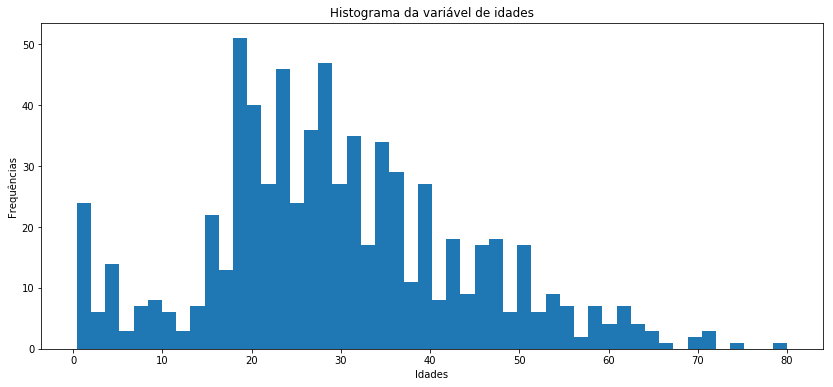

In [38]:
plt.figure(figsize=(14,6))
plt.title("Histograma da variável de idades")

# Dessa vez utilizamos a função "dropna" do pandas para limpar dados nulos da série de dados de idades
plt.hist(base['Age'].dropna() ,bins=50)
plt.xlabel('Idades')
plt.ylabel('Frequências')
plt.show()

**Intuição** : Podemos notar então que existem idades variando de em torno de 0 a 80 anos. Sendo mais comum pessoas com idades entre 20 e 30 anos.

** Variação: Comparação de distribuições **

Muitas vezes você quer checar se outras variáveis seguem a mesma distribuição de dados, para isso podemos plotar ambos os histogramas.

Ex: mesmo histograma de idades mas para homens e mulheres

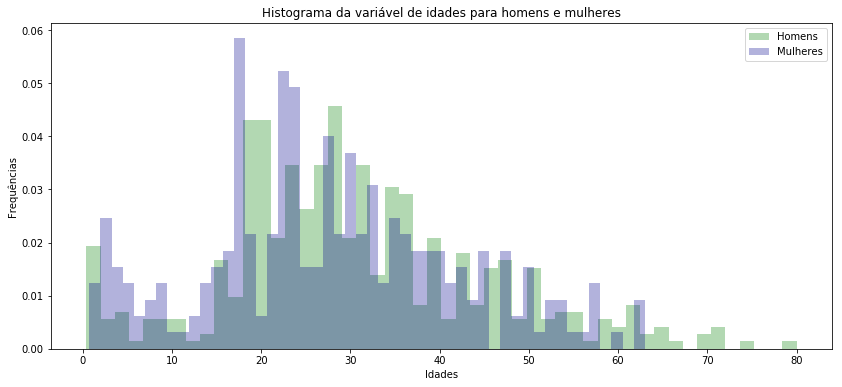

In [50]:
plt.figure(figsize=(14,6))
plt.title("Histograma da variável de idades para homens e mulheres")

# Dessa vez utilizamos a função "dropna" do pandas para limpar dados nulos da série de dados de idades
plt.hist(base[base['Sex'] == 'male']['Age'].dropna() ,bins=50, normed=True , color = 'green', alpha=0.3, label='Homens')
plt.hist(base[base['Sex'] == 'female']['Age'].dropna() ,bins=50, normed = True,color = 'darkblue', alpha = 0.3, label='Mulheres')
plt.xlabel('Idades')
plt.ylabel('Frequências')
plt.legend()
plt.show()

**Intuição** : As idades, tanto para mulheres quanto para homens, parecem ter a mesma distribuição

## 3.3 - Scatter Plot

Scatter plots são os famoso plots de "bolinhas", Lab1, em geral utilizados para ver relação entre variáveis

- Sintaxe: plt.scatter()
- Principais parâmetros:
    - data: A base de dados avaliada
    - x: Nome da primeira variável
    - y: Nome da segunda variável

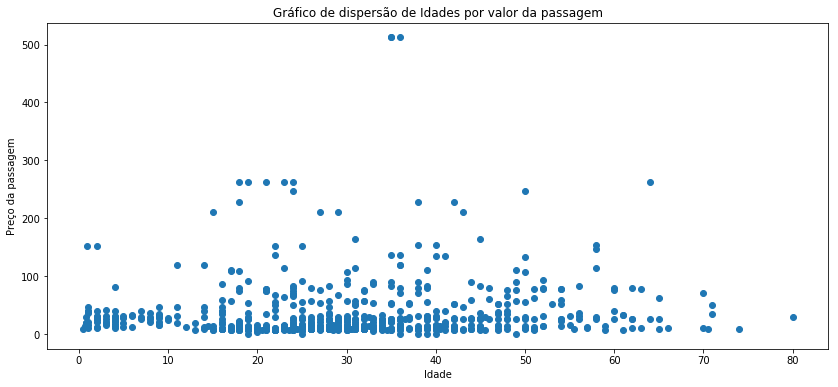

In [54]:
plt.figure(figsize=(14,6))
plt.title("Gráfico de dispersão de Idades por valor da passagem")
plt.scatter(data=base,x='Age',y='Fare')
plt.xlabel("Idade")
plt.ylabel("Preço da passagem")
plt.show()

**Intuição** : Nesse caso não é possível notar alguma correlação entre a idade e o preço da passagem

**Variação: Distinguindo classes distintas**

Vamos fazer o mesmo plot porém diferenciando quando a pessoa sobreviveu ou não.

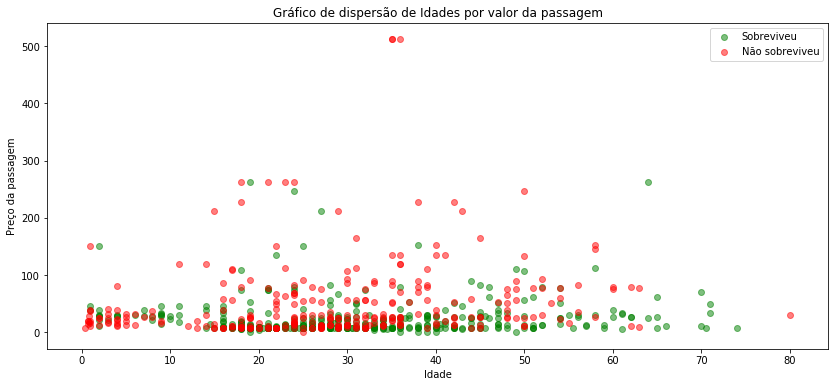

In [67]:
plt.figure(figsize=(14,6))
plt.title("Gráfico de dispersão de Idades por valor da passagem")
plt.scatter(data=base[base['Survived'] == 0],x='Age',y='Fare', color='green', alpha = 0.5, label='Sobreviveu')
plt.scatter(data=base[base['Survived'] == 1],x='Age',y='Fare', color='red', alpha = 0.5, label='Não sobreviveu')
plt.xlabel("Idade")
plt.ylabel("Preço da passagem")
plt.legend()
plt.show()

**Intuição** : Não há uma clara distinção, mas parece haver algo relacionado a sobrevivência e valor de passagem

## 3.4 - Line plot

Line plots são os plots mais famosos, que consiste basicamente na ligação dos pontos do scatter plot visto anteriormente. Como boa prática ele é utilizado em geral para dados temporais e não é aconsalhável utilizá-lo caso não tenha muitos pontos, pois a linha pode indicar uma falsa tendência.  

- Sintaxe: plt.plot()
- Principais parâmetros:
    - x: Série de dados da primeira variável
    - y: Série de dados da segunda variável